In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [2]:

# Read the data
data = pd.read_csv("D:/Chools/Day_19/daily-minimum-temperatures.csv")  # Replace "your_data.csv" with the path to your CSV file
timeseries_data = data['Temp'].values  # Assuming temperature is the column you want to forecast

In [3]:

# Preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
    X, y = [], []
    for i in range(len(timeseries_data)):
        end_ix = i + n_features
        if end_ix > len(timeseries_data)-1:
            break
        seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# Choose a number of time steps
n_steps = 3


In [4]:

# Split into samples
X, y = prepare_data(timeseries_data, n_steps)

# Reshape the data
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))


In [5]:

# Define the model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


In [6]:
# Fit the model
model.fit(X, y, epochs=300, verbose=1)

# Define the input sequence for prediction
x_input = timeseries_data[-n_steps:]  # Use the last n_steps from your data
temp_input = list(x_input)
lst_output = []

Epoch 1/300
114/114 [==============================] - 2s 3ms/step - loss: 43.5653
Epoch 2/300
114/114 [==============================] - 0s 2ms/step - loss: 8.1666
Epoch 3/300
114/114 [==============================] - 0s 2ms/step - loss: 6.8946
Epoch 4/300
114/114 [==============================] - 0s 2ms/step - loss: 6.6261
Epoch 5/300
114/114 [==============================] - 0s 3ms/step - loss: 6.5602
Epoch 6/300
114/114 [==============================] - 0s 3ms/step - loss: 6.4564
Epoch 7/300
114/114 [==============================] - 0s 3ms/step - loss: 6.4076
Epoch 8/300
114/114 [==============================] - 0s 3ms/step - loss: 6.4418
Epoch 9/300
114/114 [==============================] - 0s 2ms/step - loss: 6.4215
Epoch 10/300
114/114 [==============================] - 0s 2ms/step - loss: 6.4909
Epoch 11/300
114/114 [==============================] - 0s 3ms/step - loss: 6.3470
Epoch 12/300
114/114 [==============================] - 0s 2ms/step - loss: 6.3452
Epoch 13/300

In [7]:

# Predict for the next 30 days
for i in range(20):
    if len(temp_input) > n_steps:
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        temp_input = temp_input[1:]
        lst_output.append(yhat[0][0])
    else:
        x_input = np.array(temp_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])

# Print the predicted output
print(lst_output)


[12.9471035, 13.071998, 13.448156, 13.750673, 13.9761715, 14.172179, 14.337499, 14.466339, 14.562882, 14.634319, 14.686624, 14.724441, 14.751514, 14.770786, 14.784455, 14.794128, 14.800957, 14.805771, 14.809164, 14.811551]


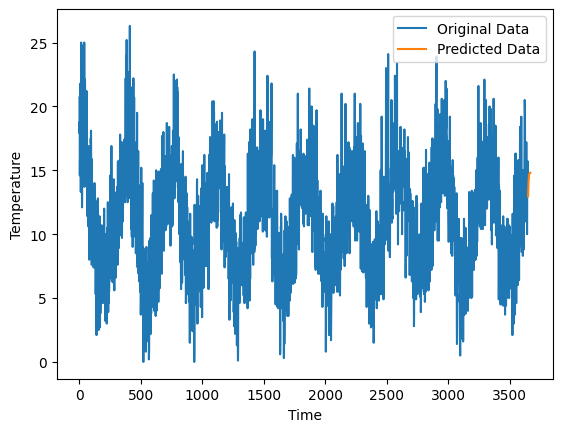

In [8]:

# Plot the results
import matplotlib.pyplot as plt
plt.plot(np.arange(len(timeseries_data)), timeseries_data, label='Original Data')
plt.plot(np.arange(len(timeseries_data), len(timeseries_data) + len(lst_output)), lst_output, label='Predicted Data')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()